# project of logistic regression

# Problem statement

Title:
Diabetes Prediction Using Machine Learning

Problem Statement:
In this project, we aim to develop a predictive model using the dataset located at /content/diabetes2.csv to identify whether a patient is likely to be diagnosed with diabetes based on several health-related attributes.

Diabetes is a chronic disease that affects millions of people worldwide. Early detection is critical to managing the condition and preventing long-term complications. The dataset contains medical diagnostic measurements such as glucose levels, BMI, age, and other relevant factors. The goal is to analyze this data and build a machine learning model that can accurately classify patients as diabetic or non-diabetic.

Project Goals:

Explore and preprocess the dataset.

Handle missing or zero values in critical medical features.

Perform exploratory data analysis (EDA) to identify patterns.

Train and evaluate classification models (e.g., Logistic Regression, Random Forest, etc.).

Optimize the model to improve prediction accuracy.

Use the final model to predict diabetes risk for new data.

Expected Outcome:
A well-evaluated machine learning model capable of predicting diabetes status (0 or 1) with high accuracy, supporting early detection and better healthcare decisions.

# importing the Libraries

In [ ]:
import pandas as pd # python libraries
import matplotlib.pyplot as plt # python libraries
import seaborn as sns # python libraries
from sklearn.preprocessing import LabelEncoder # converting datatype using libraries
from sklearn.model_selection import train_test_split # model traning and testing libraries
from sklearn.linear_model import LogisticRegression # Algorithum
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score # outcomes

# load the dataset

In [ ]:
df = pd.read_csv("/content/diabetes2.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Identify the dataset

In [ ]:
df.head() # To return the first five rows

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.tail() # To return the last five rows

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
df.sample() # To return randomly one row

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
675,6,195,70,0,0,30.9,0.328,31,1


In [ ]:
df.info() # To return the all information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.shape # To return the shape  (rows & columns)

(768, 9)

In [ ]:
df.columns # TO return the all columns names

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
df.to_string() # To return the all columns and rows

'     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction  Age  Outcome\n0              6      148             72             35        0  33.6                     0.627   50        1\n1              1       85             66             29        0  26.6                     0.351   31        0\n2              8      183             64              0        0  23.3                     0.672   32        1\n3              1       89             66             23       94  28.1                     0.167   21        0\n4              0      137             40             35      168  43.1                     2.288   33        1\n5              5      116             74              0        0  25.6                     0.201   30        0\n6              3       78             50             32       88  31.0                     0.248   26        1\n7             10      115              0              0        0  35.3                     0.134   29  

In [ ]:
df.describe() # To return the statical summary

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df=df.rename(columns={'SkinThickness':'Skin'})

# Data cleaning and missing values

In [ ]:
df.isnull().sum() # To return the count of null values

,0
Pregnancies,0
Glucose,0
BloodPressure,0
Skin,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
df.duplicated() # find duplicated

,0
0,False
1,False
2,False
3,False
4,False
...,...
763,False
764,False
765,False
766,False


In [ ]:
df['BloodPressure'].value_counts()  # To return the value count in a column

,count
BloodPressure,
70,57
74,52
78,45
68,45
72,44
64,43
80,40
76,39
60,37


# Data visualization

<Axes: xlabel='BloodPressure', ylabel='Count'>

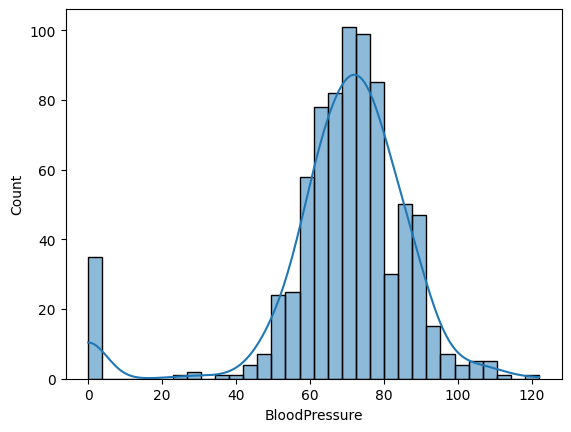

In [ ]:
sns.histplot(df['BloodPressure'],kde=True)# To return the graphical representaion based on histogram
                                          # (univariate)

<Axes: xlabel='Age', ylabel='BloodPressure'>

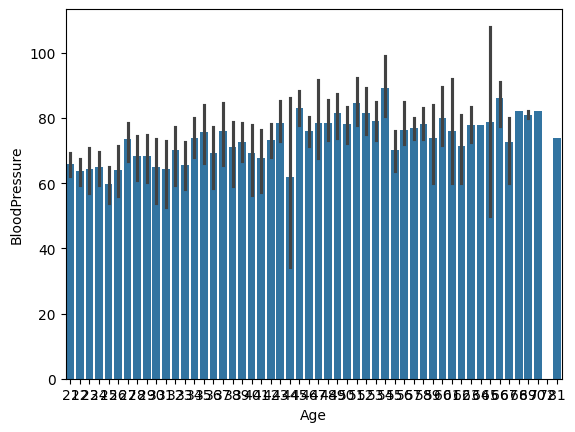

In [ ]:
sns.barplot(x='Age',y='BloodPressure',data=df) # To return graphical representaton in two columns
                                               # (bivariate)

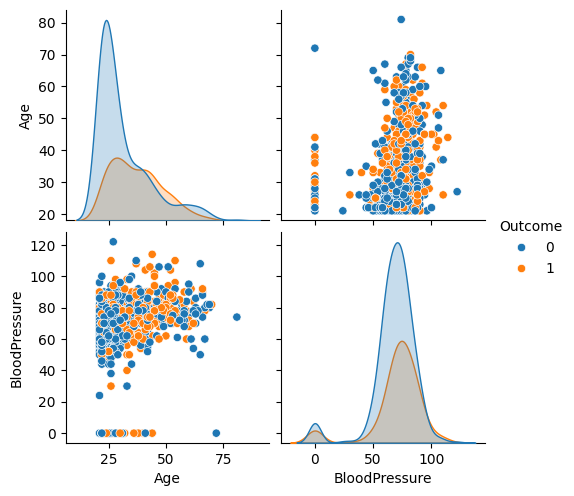

In [ ]:
sns.pairplot(df[['Age','BloodPressure','Outcome']],hue='Outcome') # To return graphical representaion in three columns
                                                               # (multivariate)

# Feature  engineering

In [ ]:
 # Using LabelEncoder
df['DiabetesPedigreeFunction']=LabelEncoder().fit_transform(df['DiabetesPedigreeFunction']) # To convert categorical into numarical
df['BMI']=LabelEncoder().fit_transform(df['BMI'])  # To convert categorical into numarical

In [ ]:
df.info() # To confirm

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Pregnancies               768 non-null    int64
 1   Glucose                   768 non-null    int64
 2   BloodPressure             768 non-null    int64
 3   Skin                      768 non-null    int64
 4   Insulin                   768 non-null    int64
 5   BMI                       768 non-null    int64
 6   DiabetesPedigreeFunction  768 non-null    int64
 7   Age                       768 non-null    int64
 8   Outcome                   768 non-null    int64
dtypes: int64(9)
memory usage: 54.1 KB


In [ ]:
df # To confirm

,Pregnancies,Glucose,BloodPressure,Skin,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,123,350,50,1
1,1,85,66,29,0,62,196,31,0
2,8,183,64,0,0,30,368,32,1
3,1,89,66,23,94,77,53,21,0
4,0,137,40,35,168,209,514,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,118,55,63,0
764,2,122,70,27,0,155,187,27,0
765,5,121,72,23,112,58,115,30,0
766,1,126,60,0,0,95,195,47,1


# Correlation

In [ ]:
df.corr()

,Pregnancies,Glucose,BloodPressure,Skin,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.031053,-0.022741,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.226973,0.107727,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.232506,0.041428,0.239528,0.065068
Skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.401773,0.185149,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.202226,0.181515,-0.042163,0.130548
BMI,0.031053,0.226973,0.232506,0.401773,0.202226,1.000000,0.146012,0.040517,0.312216
DiabetesPedigreeFunction,-0.022741,0.107727,0.041428,0.185149,0.181515,0.146012,1.000000,0.040721,0.179512
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.040517,0.040721,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.312216,0.179512,0.238356,1.000000


<Axes: >

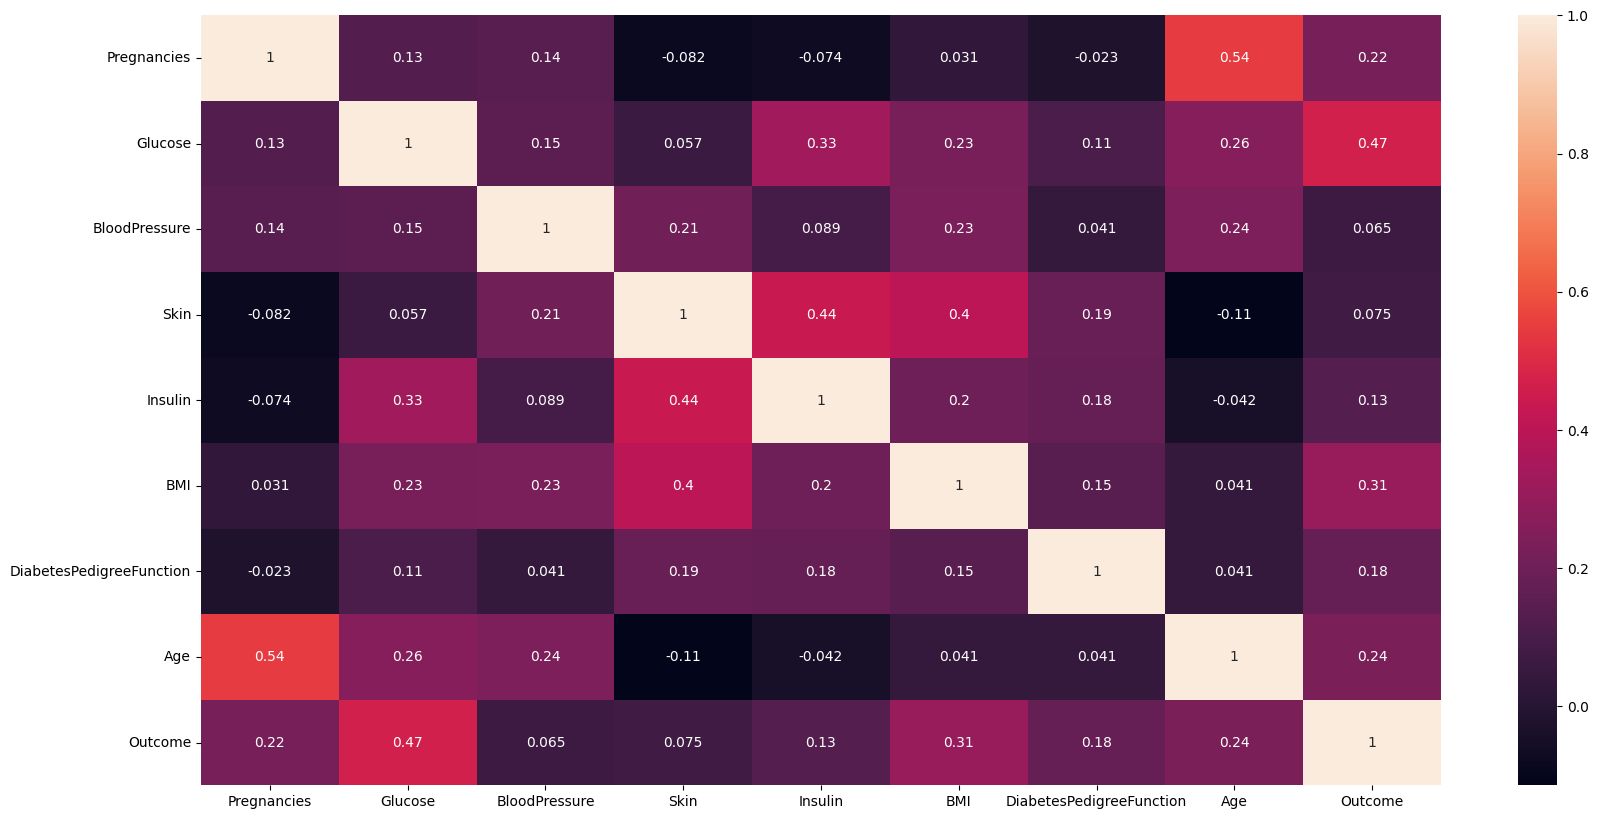

In [ ]:
plt.figure(figsize=(20,10))  # heatmap analyzing
sns.heatmap(df.corr(),annot=True)

In [ ]:
df.corr()['Outcome'].sort_values(ascending=False)

,Outcome
Outcome,1.000000
Glucose,0.466581
BMI,0.312216
Age,0.238356
Pregnancies,0.221898
DiabetesPedigreeFunction,0.179512
Insulin,0.130548
Skin,0.074752
BloodPressure,0.065068


# model traning

In [ ]:
# Independant_feature
x = df[['Pregnancies','Glucose','BloodPressure','Skin','Insulin','BMI','DiabetesPedigreeFunction','Age']]
# Dependent or target
y = df['Outcome']

In [ ]:
# To training  and testing the model
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state = 42)

In [ ]:
model=LogisticRegression()# Algorithum
model.fit(x_train,y_train) # fitting algorithum in model
y_pred=model.predict(x_test) # Predict the prediction

In [ ]:
print('Accuracy:', accuracy_score(y_test, y_pred)) # To return the Accuracy
print('Precision:', precision_score(y_test, y_pred)) # To return the precision
print('Recall:',recall_score(y_test, y_pred)) # To return the recall
print('f1 score:',f1_score(y_test,y_pred)) # To return the f1 score

Accuracy: 0.7532467532467533
Precision: 0.6491228070175439
Recall: 0.6727272727272727
f1 score: 0.6607142857142857


In [ ]:
# create and train the model in a new data
new_data = pd.DataFrame({'Pregnancies':[6],'Glucose':[2],'BloodPressure':[1],'Skin':[2],'Insulin':[3],'BMI':[0],'DiabetesPedigreeFunction':[1],'Age':[0]})
print("predicted price ",model.predict(new_data)[0])

predicted price  0


In [ ]:
# new data in another way
Pregnancies=int(input('enter your count: '))
Glucose= int(input('enter your level: '))
BloodPressure=int(input('enter your blood count: '))
Skin=int(input('enter your skin count: '))
Insulin=int(input('enter your Insulin count: '))
BMI=int(input('enter your mass count: '))
DiabetesPedigreeFunction=int(input('enter your  count: '))
Age=int(input('enter your  age: '))
new_data=[[Pregnancies,Glucose,BloodPressure,Skin,Insulin,BMI,DiabetesPedigreeFunction,Age]]
print('predict the Outcome: ',model.predict(new_data))

enter your count: 0
enter your level: 30
enter your blood count: 60
enter your skin count: 0
enter your Insulin count: 10
enter your mass count: 51
enter your  count: 100
enter your  age: 18
predict the Outcome:  [0]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
